In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Import Modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')


# Load the DataSet

In [3]:
paths = []
labels = []
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        
        label = filename.split('_')[-1]
        
        label = label.split('.')[0]
        labels.append(label.lower())

print("Dataset Loaded")


Dataset Loaded


In [4]:
paths[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

In [5]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [6]:
df = pd.DataFrame()
df['speech'] = paths
df['label']= labels
df.head()


,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [7]:
df['label'].value_counts()

fear       800
angry      800
disgust    800
neutral    800
sad        800
ps         800
happy      800
Name: label, dtype: int64

## Exploratory Data Analysis

<AxesSubplot:xlabel='label', ylabel='count'>

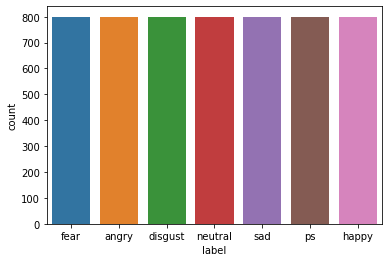

In [8]:
sns.countplot(df['label'])

In [9]:
def waveplot(data, sr, emotion):
    plt.figure(figsize = (10, 4))
    plt.title(emotion, size= 20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize = (10, 4))
    plt.title(emotion, size= 20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')

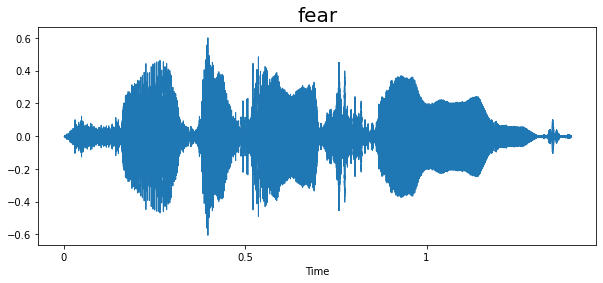

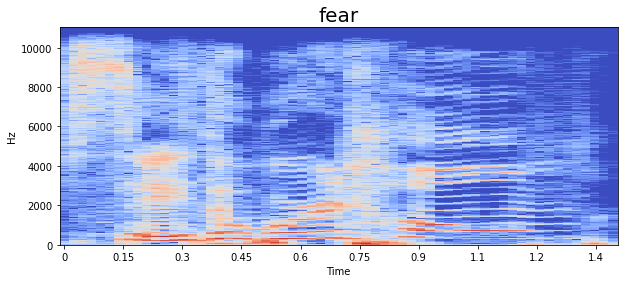

In [10]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

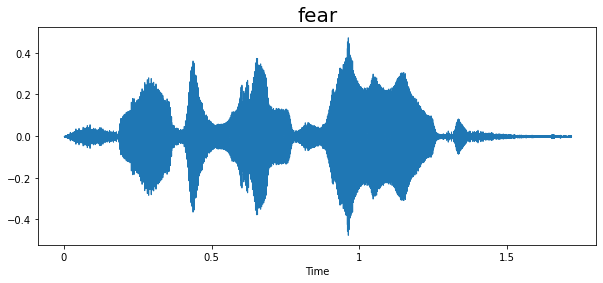

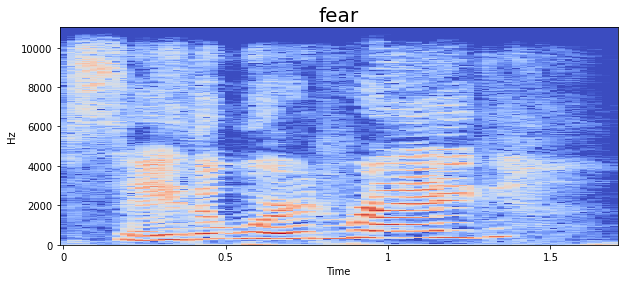

In [11]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[10]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

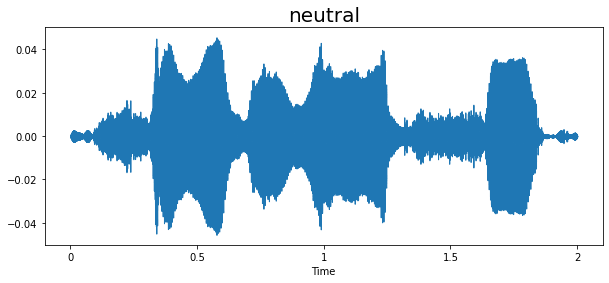

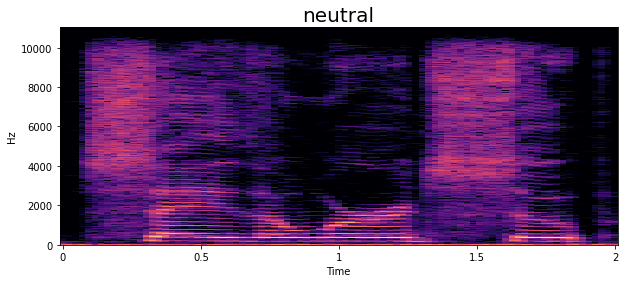

In [12]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [13]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc=np.mean(librosa.feature.mfcc(y=y, sr = sr, n_mfcc=40).T, axis=0)
    return mfcc

In [14]:
extract_mfcc(df['speech'][0])

array([-287.13037   ,   87.756935  ,   -4.139177  ,   24.081968  ,
        -16.696724  ,   12.970632  ,   10.522444  ,   -1.1463214 ,
         -0.73337686,   12.855532  ,  -19.147291  ,   -6.418063  ,
          4.9657683 ,   -2.6571155 ,  -10.655444  ,    4.9578815 ,
        -14.55586   ,   15.37587   ,   18.444935  ,   23.878317  ,
         31.495146  ,   17.326372  ,   -4.7648373 ,    1.7432437 ,
        -12.009847  ,    7.34574   ,   -3.2051265 ,   -7.171453  ,
        -11.410634  ,   -2.001994  ,   -5.610964  ,    4.5321946 ,
        -11.396625  ,   -8.892363  ,   -3.7391376 ,    4.8819685 ,
         -1.5599903 ,    2.465447  ,   11.59915   ,   11.042192  ],
      dtype=float32)

In [15]:
x_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [16]:
x_mfcc

0       [-287.13037, 87.756935, -4.139177, 24.081968, ...
1       [-350.0836, 37.654167, -6.2928553, 17.09615, 4...
2       [-341.78152, 56.153652, -16.617884, 23.219698,...
3       [-309.17456, 24.854897, -8.00109, 10.065497, -...
4       [-347.12918, 49.69155, -27.524876, 22.730288, ...
                              ...                        
5595    [-376.5839, 63.9598, -3.0598662, 11.498796, -2...
5596    [-316.5801, 43.54606, -9.336959, -0.198444, -5...
5597    [-359.7638, 81.01536, -18.355762, 5.3012295, -...
5598    [-354.38315, 103.432144, -15.916284, -10.30884...
5599    [-391.15958, 56.44471, -1.0464002, 0.9587419, ...
Name: speech, Length: 5600, dtype: object

In [17]:
X= [x for x in x_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [18]:
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [19]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])


In [20]:
y =y.toarray()

In [21]:
y.shape

(5600, 7)

## Create a LSTM model

In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences = False, input_shape=(40, 1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dropout(0.2),
    Dense(7, activation='softmax'),
    
])

model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 123)               61500     
_________________________________________________________________
dense (Dense)                (None, 64)                7936      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 231       
Total params: 71,747
Trainable params: 71,747
Non-trainable params: 0
____________________________________________________

In [23]:
#train the model
history=model.fit(X, y, validation_split=0.2, epochs=100, batch_size=512, shuffle = True)

Epoch 1/100
9/9 [==============================] - 4s 58ms/step - loss: 1.8183 - accuracy: 0.3574 - val_loss: 2.1868 - val_accuracy: 0.0929
Epoch 2/100
9/9 [==============================] - 0s 11ms/step - loss: 1.5102 - accuracy: 0.5393 - val_loss: 2.0945 - val_accuracy: 0.1063
Epoch 3/100
9/9 [==============================] - 0s 11ms/step - loss: 1.1072 - accuracy: 0.6498 - val_loss: 1.8614 - val_accuracy: 0.1571
Epoch 4/100
9/9 [==============================] - 0s 10ms/step - loss: 0.8313 - accuracy: 0.7134 - val_loss: 1.3225 - val_accuracy: 0.3893
Epoch 5/100
9/9 [==============================] - 0s 10ms/step - loss: 0.6280 - accuracy: 0.7815 - val_loss: 0.9486 - val_accuracy: 0.6589
Epoch 6/100
9/9 [==============================] - 0s 10ms/step - loss: 0.4741 - accuracy: 0.8373 - val_loss: 0.9014 - val_accuracy: 0.6679
Epoch 7/100
9/9 [==============================] - 0s 10ms/step - loss: 0.3954 - accuracy: 0.8603 - val_loss: 0.6360 - val_accuracy: 0.7366
Epoch 8/100
9/9 [===

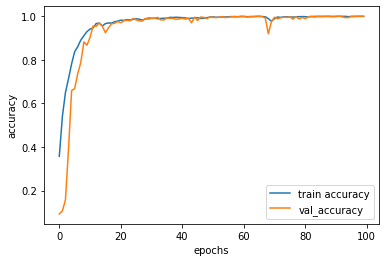

In [24]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label = 'train accuracy')
plt.plot(epochs, val_acc, label = 'val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

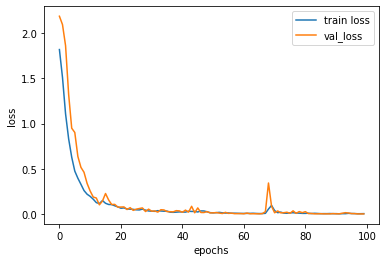

In [25]:
epochs = list(range(100))
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label = 'train loss')
plt.plot(epochs, val_loss, label = 'val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()